In [2]:
import Hawkes as hk
import numpy as np
from matplotlib import pyplot as plt
import math
from mlxtend.evaluate import bias_variance_decomp

In [6]:
def parameters_est_exp(sim_param, itv):
    simulator = hk.simulator()
    simulator.set_kernel("exp").set_baseline("const").set_parameter(sim_param)
    T = simulator.simulate(itv)
    estimator = hk.estimator()
    estimator.set_kernel("exp").set_baseline("const")
    estimator.fit(T,itv)
    estimator.plot_KS()
    return estimator, len(T)

def parameters_est_plaw(sim_param,itv):
    #mu_t = lambda x: ( 1.0 + 0.8*np.sin(2*np.pi*x/100) ) * 0.1
    mu_t = lambda x: 0.2 + 0.1*np.sin(2*np.pi*x/100) 
    simulator = hk.simulator()
    simulator.set_kernel('pow').set_baseline("const").set_parameter(sim_param)
    #simulator.set_kernel('pow').set_baseline('custom',l_custom=mu_t).set_parameter(sim_param)
    T = simulator.simulate(itv)
    estimator = hk.estimator()
    estimator.set_kernel("pow").set_baseline("const")
    estimator.fit(T,itv) 
    estimator.plot_KS()
    return estimator, len(T)


def simulate_parameters_exp(num_times, sim_param,itv):
    br, mu, alpha, beta, ll, aic, events_num = [],[],[],[],[],[],[]
    for i in range(num_times):
        model, events  = parameters_est_exp(sim_param, itv)
        br.append(model.br)
        mu.append(model.parameter["mu"])
        alpha.append(model.parameter["alpha"])
        beta.append(model.parameter["beta"])
        ll.append(model.L)
        aic.append(model.AIC)
        events_num.append(events)
    return {"br":round(np.mean(br),2),"mu":round(np.mean(mu),2),
            "alpha":round(np.mean(alpha),2), "beta":round(np.mean(beta),2),
            "ll":round(np.mean(ll),2),"aic":round(np.mean(aic),2),"events":round(np.mean(events_num),2)}

def simulate_parameters_plaw(num_times, sim_param,itv):
    br,p,c,k,ll,aic,events_num = [],[],[],[],[],[],[]
    for i in range(num_times):
        #mu_t = lambda x: ( 1.0 + 0.8*np.sin(2*np.pi*x/100) ) * 0.1
        model, events  = parameters_est_plaw(sim_param, itv)
        br.append(model.br)
        k.append(model.parameter["k"])
        p.append(model.parameter["p"])
        c.append(model.parameter["c"])
        ll.append(model.L)
        aic.append(model.AIC)
        events_num.append(events)
        
    return {"br":round(np.mean(br),2),"p":round(np.mean(p),2),
            "c":round(np.mean(c),2), "k":round(np.mean(k),2),
            "ll":round(np.mean(ll),2),"aic":round(np.mean(aic),2),"events":round(np.mean(events_num),2)}

{'br': 0.15,
 'mu': 0.05,
 'alpha': 0.15,
 'beta': 9.16,
 'll': -21.47,
 'aic': 48.93,
 'events': 6.0}

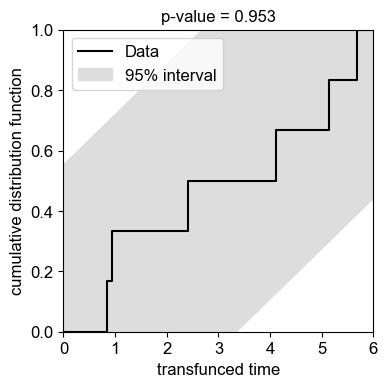

In [4]:
 simulate_parameters_exp(1, {"mu":0.1,"alpha":0.5,"beta":0.001}, [0,100])

In [ ]:
simulate_parameters_plaw(1,{"mu":0.1,'k':0.1, 'p':0.5, 'c':10},[0,500])